## Import Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import cv2, os
from keras.utils import to_categorical

## Import Dataset

In [31]:
data_path = r"C:\\Users\\DELL\\OneDrive\\Desktop\\CNN Face Mask Detection\\data"

categories = os.listdir(data_path)
labels = np.arange(len(categories))
label_dict = dict(zip(categories, labels))

print(categories)
print(labels)
print(label_dict)

['without_mask', 'with_mask']
[0 1]
{'without_mask': 0, 'with_mask': 1}


## Make The Dataset

In [32]:
img_size = 50

data = []
target = []

for category in categories:
    
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        
        try:
            img = cv2.imread(img_path)
            # cv2.imshow("LIVE", img)
            # cv2.waitKey(10)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (img_size, img_size))
            cv2.imshow("LIVE", resized)
            cv2.waitKey(10)
            
            data.append(resized)
            target.append(label_dict[category])
            
        except Exception as error:
            print(img_path, error)

In [33]:
# convert feature and target to arrays
data = np.array(data)
target = np.array(target)

In [34]:
print(data.shape)
print(target.shape)

(7553, 50, 50)
(7553,)


## Visualization

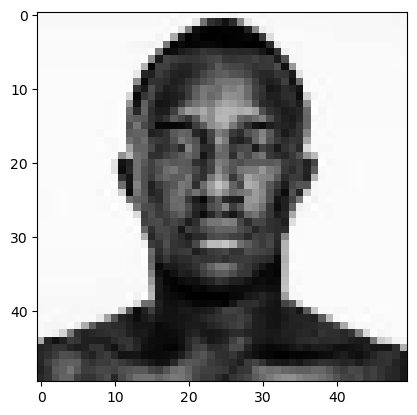

In [35]:
plt.imshow(data[0], cmap="gray")
plt.show()

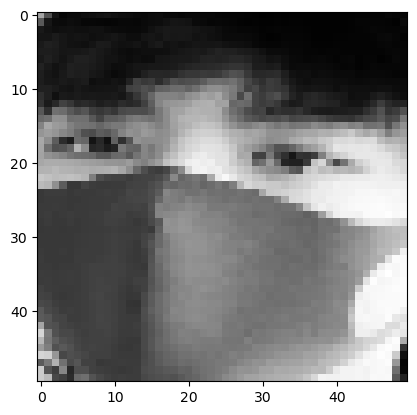

In [36]:
plt.imshow(data[4000], cmap="gray")
plt.show()

## Data Normalization

In [37]:
data_new = data / 255.0

print(data_new.shape)

(7553, 50, 50)


In [38]:
data_new = np.reshape(data_new, (data_new.shape[0], data_new.shape[1], data_new.shape[1], 1))

print(data_new.shape)

(7553, 50, 50, 1)


## Catergorical Encoding

In [39]:
target_new = to_categorical(target)

In [40]:
print(target_new)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## Save Datasets

In [ ]:
np.save("data", data_new)
np.save("target", target_new)